In [2]:
# 先运行之前预处理好的代码
import pandas as pd
import pandas as pd    #用于数据处理和分析，可处理表格数据。
import numpy as np     #用于数值计算，提供了高效的数组操作。
import matplotlib.pyplot as plt    #用于绘制各种类型的图表
import seaborn as sns   #基于matplotlib的高级绘图库，能绘制更美观的统计图形。
import warnings
warnings.filterwarnings("ignore")
 
 # 设置中文字体（解决中文显示问题）
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows系统常用黑体字体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号
data = pd.read_csv('data.csv')    #读取数据

# 先筛选字符串变量 
discrete_features = data.select_dtypes(include=['object']).columns.tolist()
# Home Ownership 标签编码
home_ownership_mapping = {
    'Own Home': 1,
    'Rent': 2,
    'Have Mortgage': 3,
    'Home Mortgage': 4
}
data['Home Ownership'] = data['Home Ownership'].map(home_ownership_mapping)

# Years in current job 标签编码
years_in_job_mapping = {
    '< 1 year': 1,
    '1 year': 2,
    '2 years': 3,
    '3 years': 4,
    '4 years': 5,
    '5 years': 6,
    '6 years': 7,
    '7 years': 8,
    '8 years': 9,
    '9 years': 10,
    '10+ years': 11
}
data['Years in current job'] = data['Years in current job'].map(years_in_job_mapping)


# Purpose 独热编码，记得需要将bool类型转换为数值
data = pd.get_dummies(data, columns=['Purpose'])
data2 = pd.read_csv("data.csv") # 重新读取数据，用来做列名对比
list_final = [] # 新建一个空列表，用于存放独热编码后新增的特征名
for i in data.columns:
    if i not in data2.columns:
       list_final.append(i) # 这里打印出来的就是独热编码后的特征名
for i in list_final:
    data[i] = data[i].astype(int) # 这里的i就是独热编码后的特征名



# Term 0 - 1 映射
term_mapping = {
    'Short Term': 0,
    'Long Term': 1
}
data['Term'] = data['Term'].map(term_mapping)
data.rename(columns={'Term': 'Long Term'}, inplace=True) # 重命名列
continuous_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()  #把筛选出来的列名转换成列表
 
 # 连续特征用中位数补全
for feature in continuous_features:     
    mode_value = data[feature].mode()[0]            #获取该列的众数。
    data[feature].fillna(mode_value, inplace=True)          #用众数填充该列的缺失值，inplace=True表示直接在原数据上修改。

# 最开始也说了 很多调参函数自带交叉验证，甚至是必选的参数，你如果想要不交叉反而实现起来会麻烦很多
# 所以这里我们还是只划分一次数据集
from sklearn.model_selection import train_test_split
X = data.drop(['Credit Default'], axis=1)  # 特征，axis=1表示按列删除
y = data['Credit Default'] # 标签
# # 按照8:2划分训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80%训练集，20%测试集


In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 标准化数据（聚类前通常需要标准化）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X_scaled

In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# 评估不同 k 值下的指标
k_range = range(2, 11)  # 测试 k 从 2 到 10
inertia_values = []
silhouette_scores = []
ch_scores = []
db_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    inertia_values.append(kmeans.inertia_)  # 惯性（肘部法则）
    silhouette = silhouette_score(X_scaled, kmeans_labels)  # 轮廓系数
    silhouette_scores.append(silhouette)
    ch = calinski_harabasz_score(X_scaled, kmeans_labels)  # CH 指数
    ch_scores.append(ch)
    db = davies_bouldin_score(X_scaled, kmeans_labels)  # DB 指数
    db_scores.append(db)
    print(f"k={k}, 惯性: {kmeans.inertia_:.2f}, 轮廓系数: {silhouette:.3f}, CH 指数: {ch:.2f}, DB 指数: {db:.3f}")


k=2, 惯性: 218529.50, 轮廓系数: 0.320, CH 指数: 479.34, DB 指数: 3.222
k=3, 惯性: 207982.87, 轮廓系数: 0.209, CH 指数: 441.88, DB 指数: 2.906
k=4, 惯性: 200477.28, 轮廓系数: 0.220, CH 指数: 399.12, DB 指数: 2.441
k=5, 惯性: 192940.36, 轮廓系数: 0.224, CH 指数: 384.19, DB 指数: 2.042
k=6, 惯性: 185411.81, 轮廓系数: 0.227, CH 指数: 380.64, DB 指数: 1.733
k=7, 惯性: 178444.49, 轮廓系数: 0.130, CH 指数: 378.31, DB 指数: 1.633
k=8, 惯性: 174920.27, 轮廓系数: 0.143, CH 指数: 352.31, DB 指数: 1.817
k=9, 惯性: 167383.96, 轮廓系数: 0.150, CH 指数: 364.27, DB 指数: 1.636
k=10, 惯性: 159824.84, 轮廓系数: 0.156, CH 指数: 378.43, DB 指数: 1.502


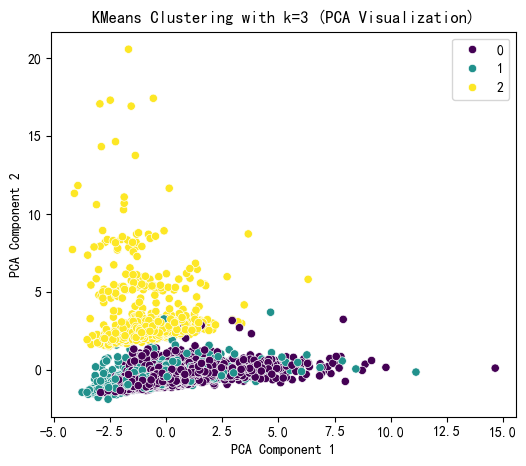

KMeans Cluster labels (k=3) added to X:
KMeans_Cluster
0                 5205
1                 1381
2                  914
dtype: int64


In [5]:
selected_k = 3 # 这里选择3后面好分析，也可以根据图选择最佳的k值

# 使用选择的 k 值进行 KMeans 聚类
kmeans = KMeans(n_clusters=selected_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
X['KMeans_Cluster'] = kmeans_labels

# 使用 PCA 降维到 2D 进行可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans 聚类结果可视化
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title(f'KMeans Clustering with k={selected_k} (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# 打印 KMeans 聚类标签的前几行
print(f"KMeans Cluster labels (k={selected_k}) added to X:")
print(X[['KMeans_Cluster']].value_counts())

In [6]:
X.columns

Index(['Id', 'Home Ownership', 'Annual Income', 'Years in current job',
       'Tax Liens', 'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Long Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score', 'Purpose_business loan', 'Purpose_buy a car',
       'Purpose_buy house', 'Purpose_debt consolidation',
       'Purpose_educational expenses', 'Purpose_home improvements',
       'Purpose_major purchase', 'Purpose_medical bills', 'Purpose_moving',
       'Purpose_other', 'Purpose_renewable energy', 'Purpose_small business',
       'Purpose_take a trip', 'Purpose_vacation', 'Purpose_wedding',
       'KMeans_Cluster'],
      dtype='object')

In [7]:
x1= X.drop('KMeans_Cluster',axis=1) # 删除聚类标签列
y1 = X['KMeans_Cluster']
# 构建随机森林，用shap重要性来筛选重要性
import shap
import numpy as np
from sklearn.ensemble import RandomForestClassifier  # 随机森林分类器
model = RandomForestClassifier(n_estimators=100, random_state=42)  # 随机森林模型
model.fit(x1, y1)  # 训练模型,此时无需在意准确率 直接全部数据用来训练了

RandomForestClassifier(random_state=42)

In [8]:
shap.initjs()
# 初始化 SHAP 解释器
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x1) # 这个计算耗时
shap_values.shape # 第一维是样本数，第二维是特征数，第三维是类别数

(7500, 31, 3)

--- 1. SHAP 特征重要性条形图 ---


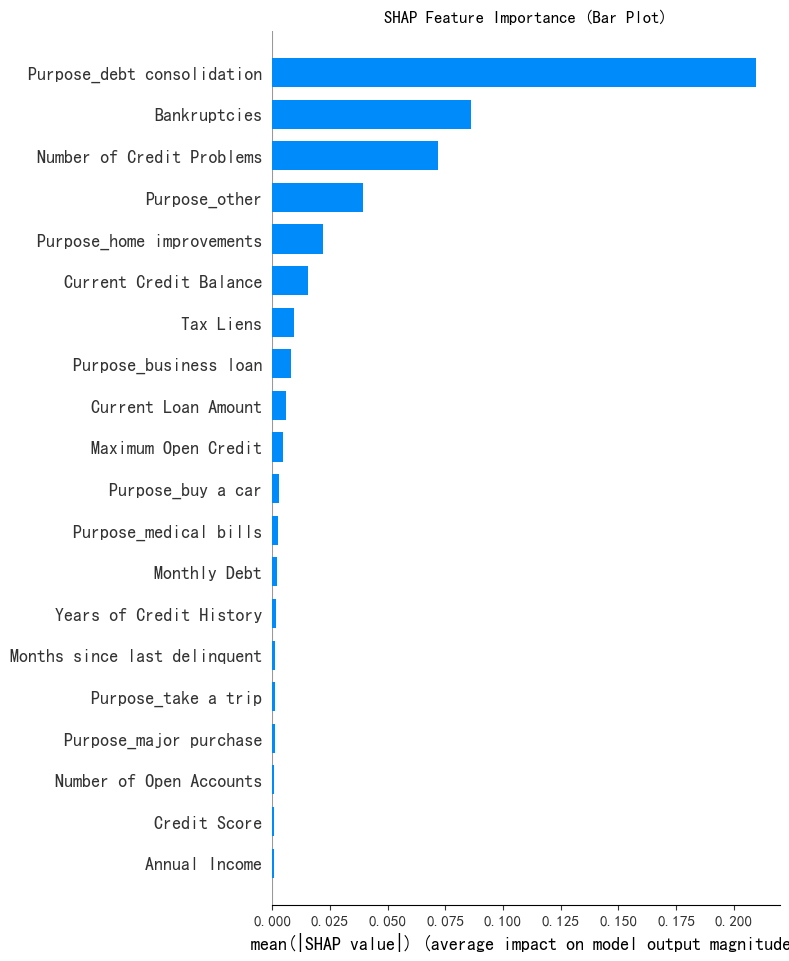

In [9]:
print("--- 1. SHAP 特征重要性条形图 ---")
shap.summary_plot(shap_values[:, :, 0], x1, plot_type="bar",show=False)  #  这里的show=False表示不直接显示图形,这样可以继续用plt来修改元素，不然就直接输出了
plt.title("SHAP Feature Importance (Bar Plot)")
plt.show()

In [10]:
# 此时判断一下这几个特征是离散型还是连续型
import pandas as pd
selected_features = ['Purpose_debt consolidation', 'Bankruptcies',
                     'Number of Credit Problems', 'Purpose_other']

for feature in selected_features:
    unique_count = X[feature].nunique() # 唯一值指的是在某一列或某个特征中，不重复出现的值
    # 连续型变量通常有很多唯一值，而离散型变量的唯一值较少
    print(f'{feature} 的唯一值数量: {unique_count}')
    if unique_count < 10:  # 这里 10 是一个经验阈值，可以根据实际情况调整
        print(f'{feature} 可能是离散型变量')
    else:
        print(f'{feature} 可能是连续型变量')

Purpose_debt consolidation 的唯一值数量: 2
Purpose_debt consolidation 可能是离散型变量
Bankruptcies 的唯一值数量: 5
Bankruptcies 可能是离散型变量
Number of Credit Problems 的唯一值数量: 8
Number of Credit Problems 可能是离散型变量
Purpose_other 的唯一值数量: 2
Purpose_other 可能是离散型变量


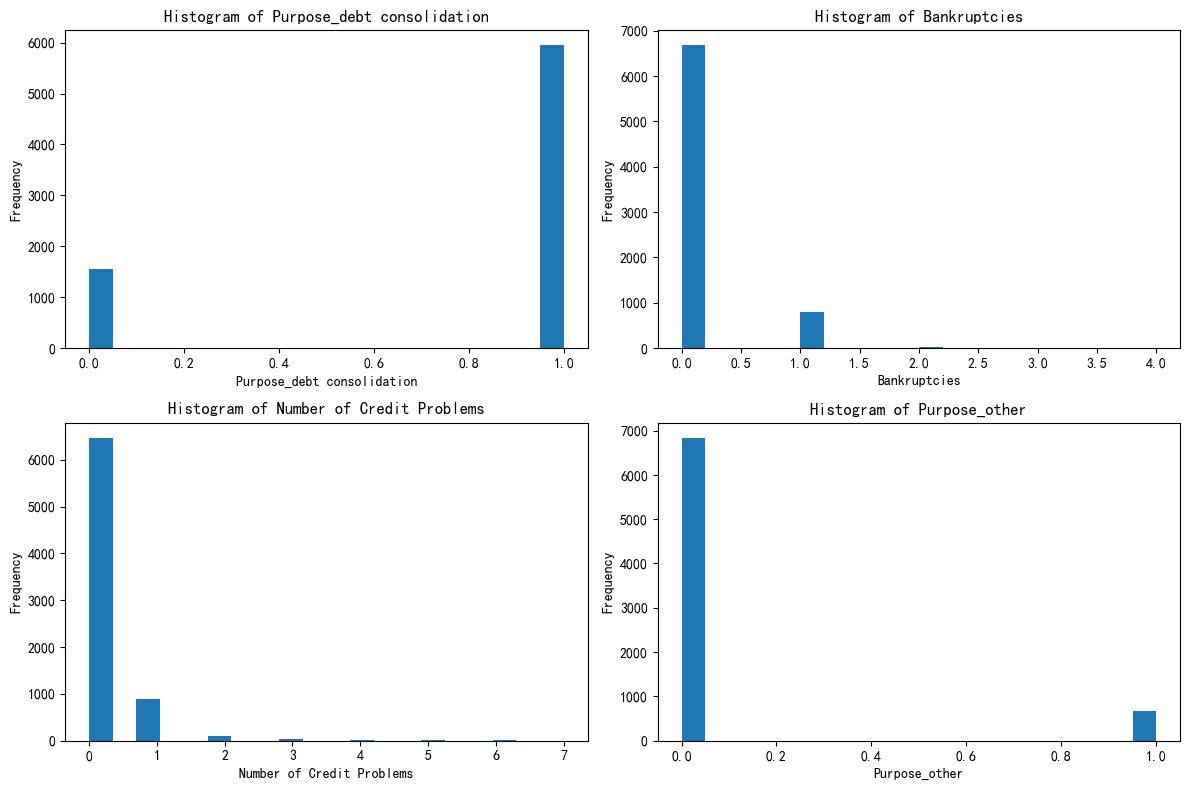

In [11]:
# X["Purpose_debt consolidation"].value_counts() # 统计每个唯一值的出现次数
import matplotlib.pyplot as plt

# 总样本中的前四个重要性的特征分布图
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    axes[i].hist(X[feature], bins=20)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
X[['KMeans_Cluster']].value_counts()

KMeans_Cluster
0                 5205
1                 1381
2                  914
dtype: int64

In [13]:
X_cluster0 = X[X['KMeans_Cluster'] == 0]
X_cluster1 = X[X['KMeans_Cluster'] == 1]
X_cluster2 = X[X['KMeans_Cluster'] == 2]

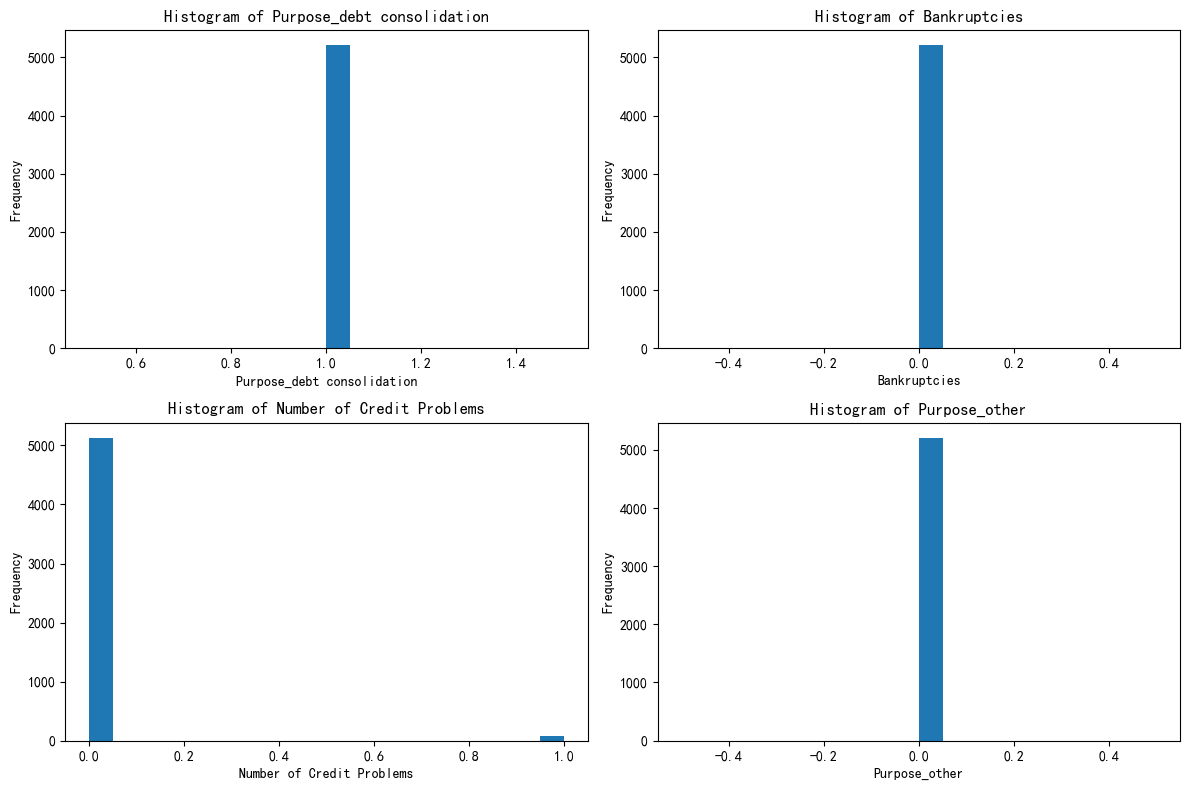

In [14]:
import matplotlib.pyplot as plt

# 总样本中的前四个重要性的特征分布图
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    axes[i].hist(X_cluster0[feature], bins=20)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


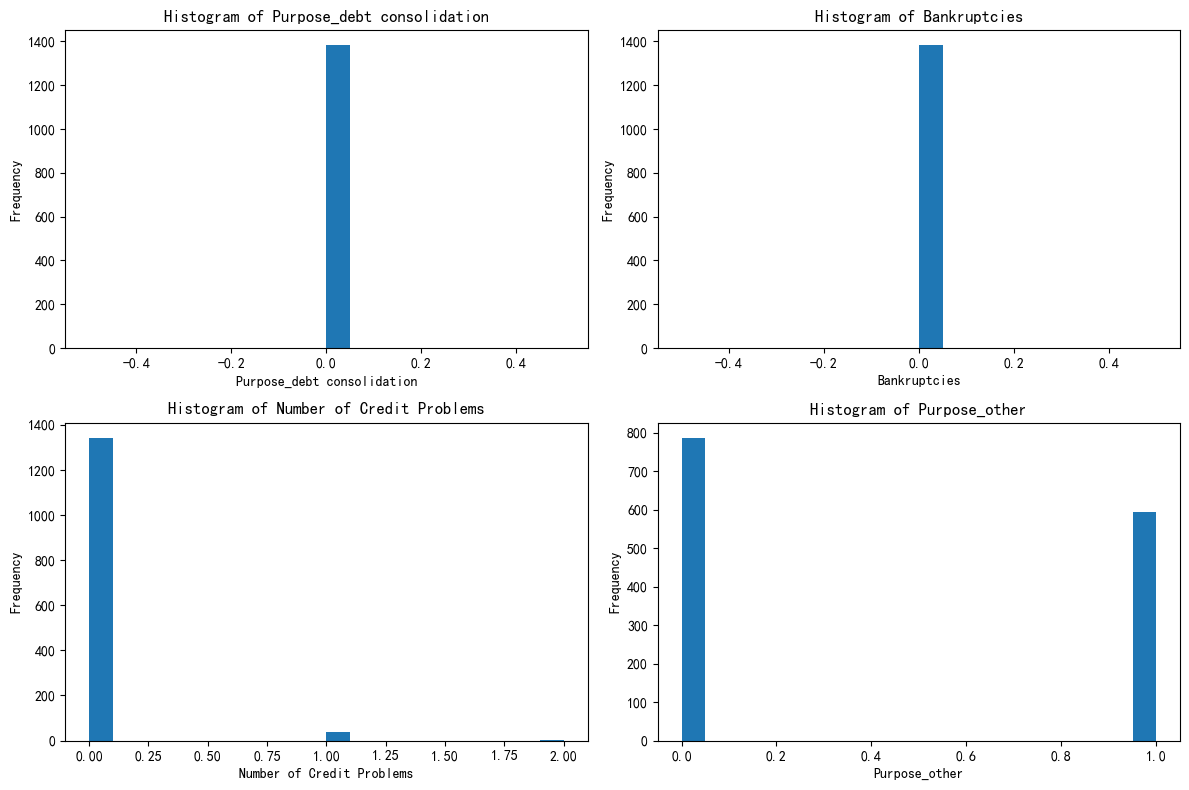

In [15]:
import matplotlib.pyplot as plt

# 总样本中的前四个重要性的特征分布图
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    axes[i].hist(X_cluster1[feature], bins=20)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

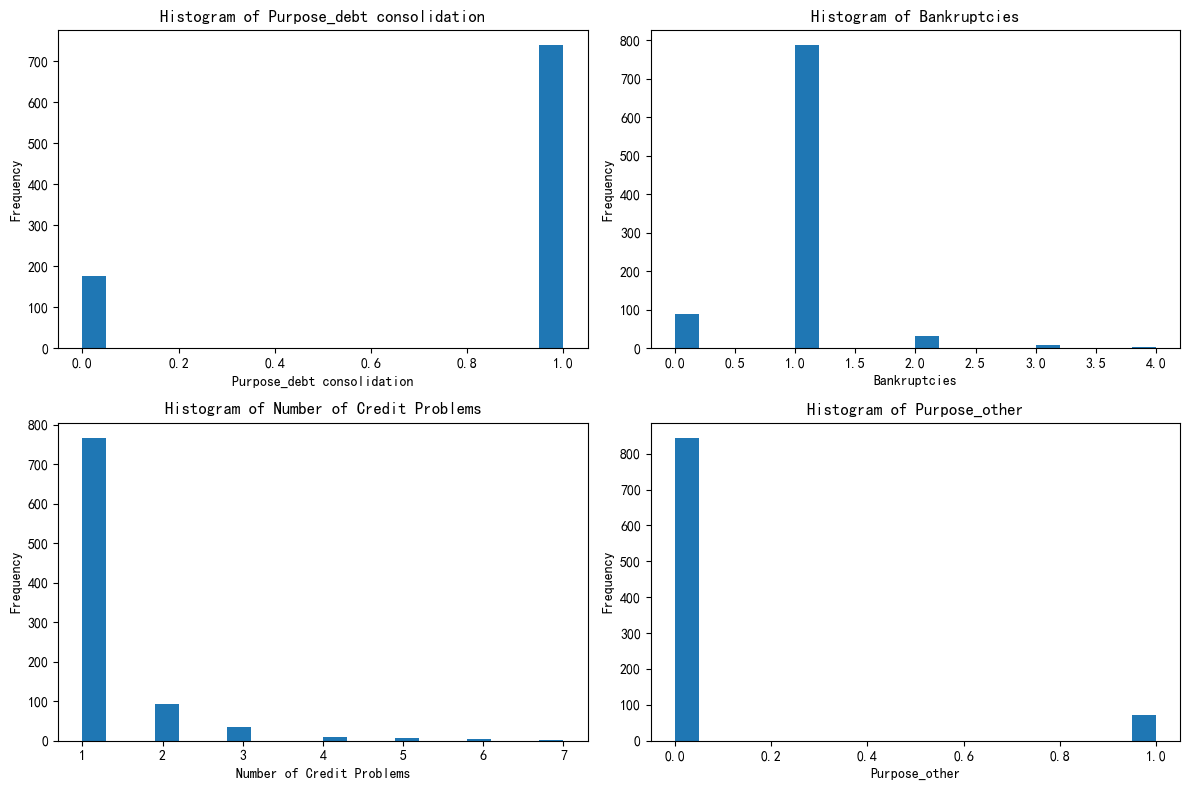

In [16]:
import matplotlib.pyplot as plt

# 总样本中的前四个重要性的特征分布图
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    axes[i].hist(X_cluster2[feature], bins=20)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()